<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/EE-769-Introduction-to-Machine-Learning/blob/main/Assignments/Assignment_2_final_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from joblib import dump,load
from sklearn import metrics

In [ ]:
as_read_unseen_data_df = pd.read_csv('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/test.csv')

# Feature split on date recorded

In [ ]:
# Initiate the dataframe to store created columns by splitting 'date_recorded'
date_recorded_unseen_data_split_df = pd.DataFrame(columns=['Year', 'Month', 'Date'])

# Split the 'date' recorded column 
date_recorded_unseen_data_split_df[['Year', 'Month', 'Date']] = as_read_unseen_data_df['date_recorded'].str.split('-', expand=True).astype('int64')

# Display the dataframe
display(date_recorded_unseen_data_split_df)
print('--'*100)

# Check data types of the created dataframe
display(date_recorded_unseen_data_split_df[['Year', 'Month', 'Date']].dtypes)
print('--'*100)

# Add the columns to reduced seen dataframe and drop 'date_recorded'
reduced_unseen_data_v1_df = pd.concat([as_read_unseen_data_df, date_recorded_unseen_data_split_df], axis=1).drop(columns='date_recorded')

# Display reduced seen data version
display(reduced_unseen_data_v1_df)

,Year,Month,Date
0,2011,2,25
1,2011,4,17
2,2011,3,27
3,2011,7,14
4,2011,7,31
...,...,...,...
14845,2011,3,10
14846,2011,3,18
14847,2012,11,3
14848,2013,1,18


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Year     int64
Month    int64
Date     int64
dtype: object

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Unnamed: 0,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Year,Month,Date
0,0,21215,0.0,Kuamu,1676,Kuamu,35.247289,-8.113243,none,0,Rufiji,Mahanzi,Iringa,11,1,Iringa Rural,Wasa,769,True,GeoData Consultants Ltd,VWC,Wasa,True,2004,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,2011,2,25
1,1,25893,0.0,Kirde,0,DWE,36.163435,-5.218454,Zahanati,0,Wami / Ruvu,Uzunguni,Dodoma,1,1,Kondoa,Chandama,0,True,GeoData Consultants Ltd,VWC,Soya,False,0,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,2011,4,17
2,2,15713,0.0,Water,0,Gover,36.363337,-7.297600,Uganda,0,Rufiji,Uganda,Dodoma,1,1,Mpwapwa,Ipera,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2011,3,27
3,3,17247,0.0,Ka,0,KA,31.496315,-2.167140,Kakindo,0,Lake Victoria,Nyamilanda A,Kagera,18,3,Muleba,Kyebitembe,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2011,7,14
4,4,1248,0.0,World Vision,0,KYASHA ENTERPR,31.843905,-1.244841,Shule Ya Msingi Ibosa,0,Lake Victoria,Ibosa,Kagera,18,2,Bukoba Rural,Nyakato,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,14845,45291,1000.0,Danida,1811,DANID,34.533405,-9.781788,none,0,Lake Nyasa,Ng'Alike,Iringa,11,5,Ludewa,Mlangali,45,True,GeoData Consultants Ltd,VWC,DANIDA,False,1988,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,2011,3,10
14846,14846,54736,0.0,Solidame,252,SOLIDAME,36.665856,-8.141162,Kwamadenge,0,Rufiji,Magoha,Morogoro,5,3,Kilombero,Lumemo,150,True,GeoData Consultants Ltd,NaN,NaN,True,2010,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2011,3,18
14847,14847,44238,0.0,Government Of Tanzania,0,Central government,33.020305,-4.949560,Kwa Mzee Salum Chata,0,Lake Tanganyika,Simbo 2,Tabora,14,3,Uyui,Magiri,0,True,GeoData Consultants Ltd,VWC,Maguri water supply,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe multiple,communal standpipe,2012,11,3
14848,14848,13229,0.0,Tassaf I,1294,TASSAF,30.588892,-3.837622,Center,0,Lake Tanganyika,Maendeleo,Kigoma,16,1,Kibondo,Rugongowe,700,True,GeoData Consultants Ltd,VWC,Kichananga gravity water supply,False,2004,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,2013,1,18


# Select the data as per the seen data

In [ ]:
reduced_seen_data_v8_df = pd.read_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/reduced_seen_data_v8_df.pkl')

selected_column_names = reduced_seen_data_v8_df.columns.drop('status_group')

reduced_unseen_data_v2_df = reduced_unseen_data_v1_df[selected_column_names]

display(reduced_unseen_data_v2_df.columns)


,amount_tsh,funder,gps_height,installer,longitude,latitude,num_private,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,Year,Month,Date
0,0.0,Kuamu,1676,Kuamu,35.247289,-8.113243,0,11,1,769,True,VWC,True,2004,2011,2,25
1,0.0,Kirde,0,DWE,36.163435,-5.218454,0,1,1,0,True,VWC,False,0,2011,4,17
2,0.0,Water,0,Gover,36.363337,-7.297600,0,1,1,0,True,VWC,True,0,2011,3,27
3,0.0,Ka,0,KA,31.496315,-2.167140,0,18,3,0,True,VWC,True,0,2011,7,14
4,0.0,World Vision,0,KYASHA ENTERPR,31.843905,-1.244841,0,18,2,0,True,VWC,True,0,2011,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,1000.0,Danida,1811,DANID,34.533405,-9.781788,0,11,5,45,True,VWC,False,1988,2011,3,10
14846,0.0,Solidame,252,SOLIDAME,36.665856,-8.141162,0,5,3,150,True,NaN,True,2010,2011,3,18
14847,0.0,Government Of Tanzania,0,Central government,33.020305,-4.949560,0,14,3,0,True,VWC,True,0,2012,11,3
14848,0.0,Tassaf I,1294,TASSAF,30.588892,-3.837622,0,16,1,700,True,VWC,False,2004,2013,1,18


### Function to get columns not matching in 2 dataframes

In [ ]:
# Define functions to get lists of missing columns in 2 dataframes
def get_missing_columns_lists(left_df, right_df):
    """
    - Tejas Chaudhari
    """
    # Get columns in left dataframe which are missing in right dataframe
    missing_left_column_names_list = []
    for i, left_column_name in enumerate(left_df):
        if left_column_name not in right_df.columns:
            missing_left_column_names_list.append(left_column_name)

    # Dsiplay results
    print('Columns in left_df which are missing in right_df are: ')
    print(missing_left_column_names_list)
    print('--'*50)

    # Get columns in right dataframe which are missing in left dataframe
    missing_right_column_names_list = []
    for i, right_column_name in enumerate(right_df.columns):
        if right_column_name not in left_df.columns:
            missing_right_column_names_list.append(right_column_name)

    # Dsiplay results
    print('Columns in right_df which are missing in left_df are: ')
    print(missing_right_column_names_list)
    print('--'*50)

    return missing_left_column_names_list, missing_right_column_names_list


In [ ]:
get_missing_columns_lists(reduced_unseen_data_v2_df, reduced_seen_data_v8_df)

Columns in left_df which are missing in right_df are: 
[]
----------------------------------------------------------------------------------------------------
Columns in right_df which are missing in left_df are: 
['status_group']
----------------------------------------------------------------------------------------------------


([], ['status_group'])

# Encode

In [ ]:
# Encode using pandas '.get_dummies'
encoded_seen_data_v1_df = pd.get_dummies(reduced_unseen_data_v2_df)

# Display
display(encoded_seen_data_v1_df)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,Year,Month,Date,funder_0,funder_A/co Germany,funder_Aar,funder_Abasia,funder_Abc-ihushi Development Cent,funder_Abd,funder_Abs,funder_Aco/germany,funder_Acord,funder_Acord Ngo,funder_Acra,funder_Action Aid,funder_Action Contre La Faim,funder_Adb,funder_Adf,funder_Adp,funder_Adp Mombo,funder_Adp/w,funder_Adra,funder_Af,funder_African,funder_African 2000 Network,funder_African Development Bank,funder_African Development Foundation,funder_African Muslim Agency,funder_African Realief Committe Of Ku,funder_African Relie,funder_Africare,...,installer_lutheran church,installer_maendeleo ya jamii,installer_maji mugumu,installer_marafip,installer_mchina,installer_mwakifuna,installer_mwita kichere,installer_not known,installer_plan int,installer_private,installer_rc ch,installer_rc church,installer_salamu kita,installer_secondary,installer_secondary school,installer_shule,installer_ter,installer_unknown,installer_villagers,installer_villigers,installer_wanan,installer_wananchi,installer_wasab,installer_wizara ya maji,installer_world,public_meeting_False,public_meeting_True,scheme_management_Company,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_False,permit_True
0,0.0,1676,35.247289,-8.113243,0,11,1,769,2004,2011,2,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0.0,0,36.163435,-5.218454,0,1,1,0,0,2011,4,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.0,0,36.363337,-7.297600,0,1,1,0,0,2011,3,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0.0,0,31.496315,-2.167140,0,18,3,0,0,2011,7,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.0,0,31.843905,-1.244841,0,18,2,0,0,2011,7,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,1000.0,1811,34.533405,-9.781788,0,11,5,45,1988,2011,3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
14846,0.0,252,36.665856,-8.141162,0,5,3,150,2010,2011,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
14847,0.0,0,33.020305,-4.949560,0,14,3,0,0,2012,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
14848,0.0,1294,30.588892,-3.837622,0,16,1,700,2004,2013,1,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Display current version of encoded
display(encoded_seen_data_v1_df)
print('--'*100)

# Data types
encoded_seen_data_v1_df.dtypes.value_counts()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,Year,Month,Date,funder_0,funder_A/co Germany,funder_Aar,funder_Abas Ka,funder_Abasia,funder_Abd,funder_Abdala,funder_Abddwe,funder_Abdul,funder_Abood,funder_Aco/germany,funder_Acord,funder_Acord Ngo,funder_Acra,funder_Act,funder_Act Mara,funder_Action Aid,funder_Action Contre La Faim,funder_Action In A,funder_Adap,funder_Adb,funder_Adf,funder_Adp,funder_Adp Bungu,funder_Adp Mombo,funder_Adp/w,funder_Adra,funder_Af,...,installer_peter,installer_plan Int,installer_private,installer_rc church,installer_secondary,installer_secondary school,installer_sengerema Water Department,installer_sengerema water Department,installer_shule,installer_stansilaus,installer_upper Ruvu,installer_villager,installer_villagers,installer_wanan,installer_wananchi,installer_wananchi technicians,installer_water board,installer_wizara ya maji,installer_world,installer_world banks,installer_world vision,public_meeting_False,public_meeting_True,scheme_management_Company,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_False,permit_True,status_group_functional,status_group_functional needs repair,status_group_non functional
0,7.0,1203,37.228664,-3.256505,0,3,5,90,2008,2013,3,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
1,0.0,1409,34.615481,-9.972601,0,11,5,70,1984,2011,2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,0.0,1572,36.658778,-3.321529,0,2,2,150,2002,2013,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,0.0,0,33.628025,-8.860795,0,12,2,0,0,2011,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
4,300.0,1283,37.655509,-3.669777,0,3,2,34,2007,2013,3,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,0.0,0,32.383715,-3.457624,0,17,3,0,0,2013,1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
44546,0.0,0,31.615509,-2.738682,0,18,8,0,0,2011,7,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
44547,0.0,969,35.134412,-10.676062,0,10,3,60,1977,2013,2,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
44548,200.0,1269,37.886287,-4.390882,0,3,3,80,2011,2013,3,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


uint8      3524
int64         9
float64       3
dtype: int64

In [ ]:
def XGB_column_names_cleaner(X_data_df):
    """
    - Tejas Chaudhari
    """

    # Initiate dataframe
    XGBC_X_data_df = X_data_df.copy(deep=True)

    # Script to remove '[', ']', and '<' from column names
    for i, column_name in enumerate(X_data_df.columns):
        if '[' in column_name or ']' in column_name or '<' in column_name:
            print('Column name to change: ', column_name)
            new_column_name = column_name.replace(']', '_').replace('[', '_')
            XGBC_X_data_df.rename(columns={column_name: new_column_name}, inplace=True)
            print('Changed to: ', XGBC_X_data_df.columns[i])
    
    return XGBC_X_data_df

In [ ]:
XGBRFC_encoded_data_df = XGB_column_names_cleaner(encoded_seen_data_v1_df)

In [ ]:
X_train = pd.read_pickle('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/X_train.pkl')

display(X_train)
display(XGBRFC_encoded_data_df)

selected_column_names_train = X_train.columns

selected_XGBRFC_encoded_data_df = XGBRFC_encoded_data_df[selected_column_names_train]

display(selected_XGBRFC_encoded_data_df)

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,Year,Month,Date,funder_Aic,funder_Dwsp,funder_Ga,funder_Government Of Tanzania,funder_Isf,funder_Kiuma,funder_Lga,funder_Ministry Of Water,funder_Peace Cope,funder_Ridep,funder_W.B,funder_World Bank,installer_AIC,installer_Central govt,installer_DWE,installer_Government,installer_KIUMA,installer_KYASHA ENTERPR,installer_MA,installer_RWE,public_meeting_False,public_meeting_True,scheme_management_Private operator,scheme_management_VWC,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_False
15820,0.0,1747.0,35.011547,-9.484053,11.0,4.0,70.0,2006.0,2011.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
17753,0.0,1266.0,33.872320,-2.004639,20.0,4.0,180.0,1994.0,2012.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
28830,50.0,156.0,38.349892,-6.633128,6.0,1.0,25.0,2007.0,2011.0,3.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6792,6.0,1115.0,37.460337,-3.350670,3.0,4.0,45.0,2008.0,2013.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34677,0.0,0.0,33.321432,-7.911832,12.0,1.0,0.0,0.0,2011.0,4.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,0.0,1198.0,33.698913,-1.745021,20.0,3.0,1.0,1995.0,2012.0,12.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13927,20.0,197.0,38.695953,-5.251525,4.0,3.0,400.0,1983.0,2011.0,3.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
919,6.0,809.0,37.498358,-3.396167,3.0,4.0,15.0,2008.0,2013.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
38467,0.0,1378.0,37.087345,-3.157862,3.0,7.0,1.0,2009.0,2013.0,3.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,Year,Month,Date,funder_0,funder_A/co Germany,funder_Aar,funder_Abasia,funder_Abc-ihushi Development Cent,funder_Abd,funder_Abs,funder_Aco/germany,funder_Acord,funder_Acord Ngo,funder_Acra,funder_Action Aid,funder_Action Contre La Faim,funder_Adb,funder_Adf,funder_Adp,funder_Adp Mombo,funder_Adp/w,funder_Adra,funder_Af,funder_African,funder_African 2000 Network,funder_African Development Bank,funder_African Development Foundation,funder_African Muslim Agency,funder_African Realief Committe Of Ku,funder_African Relie,funder_Africare,...,installer_lutheran church,installer_maendeleo ya jamii,installer_maji mugumu,installer_marafip,installer_mchina,installer_mwakifuna,installer_mwita kichere,installer_not known,installer_plan int,installer_private,installer_rc ch,installer_rc church,installer_salamu kita,installer_secondary,installer_secondary school,installer_shule,installer_ter,installer_unknown,installer_villagers,installer_villigers,installer_wanan,installer_wananchi,installer_wasab,installer_wizara ya maji,installer_world,public_meeting_False,public_meeting_True,scheme_management_Company,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_False,permit_True
0,0.0,1676,35.247289,-8.113243,0,11,1,769,2004,2011,2,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0.0,0,36.163435,-5.218454,0,1,1,0,0,2011,4,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.0,0,36.363337,-7.297600,0,1,1,0,0,2011,3,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0.0,0,31.496315,-2.167140,0,18,3,0,0,2011,7,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.0,0,31.843905,-1.244841,0,18,2,0,0,2011,7,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,1000.0,1811,34.533405,-9.781788,0,11,5,45,1988,2011,3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
14846,0.0,252,36.665856,-8.141162,0,5,3,150,2010,2011,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
14847,0.0,0,33.020305,-4.949560,0,14,3,0,0,2012,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
14848,0.0,1294,30.588892,-3.837622,0,16,1,700,2004,2013,1,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,Year,Month,Date,funder_Aic,funder_Dwsp,funder_Ga,funder_Government Of Tanzania,funder_Isf,funder_Kiuma,funder_Lga,funder_Ministry Of Water,funder_Peace Cope,funder_Ridep,funder_W.B,funder_World Bank,installer_AIC,installer_Central govt,installer_DWE,installer_Government,installer_KIUMA,installer_KYASHA ENTERPR,installer_MA,installer_RWE,public_meeting_False,public_meeting_True,scheme_management_Private operator,scheme_management_VWC,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_False
0,0.0,1676,35.247289,-8.113243,11,1,769,2004,2011,2,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0.0,0,36.163435,-5.218454,1,1,0,0,2011,4,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
2,0.0,0,36.363337,-7.297600,1,1,0,0,2011,3,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0.0,0,31.496315,-2.167140,18,3,0,0,2011,7,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0.0,0,31.843905,-1.244841,18,2,0,0,2011,7,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,1000.0,1811,34.533405,-9.781788,11,5,45,1988,2011,3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
14846,0.0,252,36.665856,-8.141162,5,3,150,2010,2011,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14847,0.0,0,33.020305,-4.949560,14,3,0,0,2012,11,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
14848,0.0,1294,30.588892,-3.837622,16,1,700,2004,2013,1,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


# Get labels

In [ ]:
# Load saved model
saved_path = '/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored models/fitted_RFC_randomized_search_cv_model.joblib'
fitted_RFC_randomized_search_cv_model = load(saved_path)

print(fitted_RFC_randomized_search_cv_model.best_estimator_)

y_test_estimated = fitted_RFC_randomized_search_cv_model.best_estimator_.predict(selected_XGBRFC_encoded_data_df)

saved_path = '/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/fitted_y_label_encoder.joblib'
fitted_y_label_encoder = load(saved_path)

final_labels = fitted_y_label_encoder.inverse_transform(y_test_estimated)

final_labels_series = pd.Series(final_labels)

display(final_labels_series)

final_labels_series.to_csv('/content/drive/MyDrive/EE 769/Assignment data/Assignment 2 data/stored data/final_labels.csv',
                               index=False, header=False)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=506,
                       n_jobs=-1, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)


0                     functional
1                 non functional
2                     functional
3                     functional
4        functional needs repair
                  ...           
14845                 functional
14846                 functional
14847             non functional
14848             non functional
14849                 functional
Length: 14850, dtype: object

# Notes
The above process of using same transformations of seen data on unseen data can be easily done using pipelines. For example,
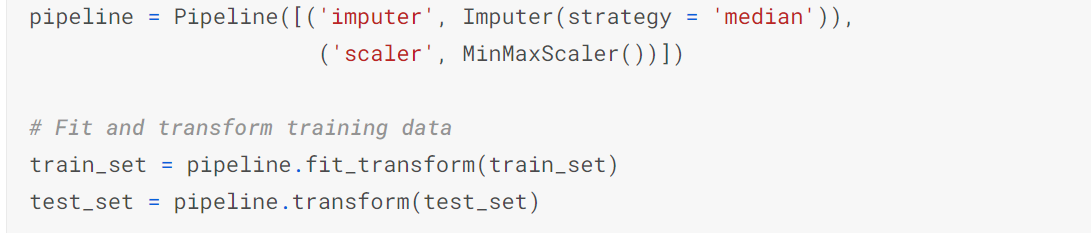